<a href="https://colab.research.google.com/github/sultanbst123/cancer-classification-submission-dicoding-tahap-3-/blob/main/CNN_TFLITE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#SUBMISSION TAHAP 3 DICODING
 
"MULTICLASS CLASSIFICATION"
 
Clasification gambar Kanker Colorectal manusia,dataset berisi 5000 gambar dengan 625 gambar untuk setiap kelas Semua gambar berukuran 150x150px dalam mode RGB.
 
Disini saya akan mengunakan pre-trained model karena data yang saya punya saat ini kecil.

#LIBRARY

In [ ]:
#basic library
import numpy as np
import pandas as pd
 
#deep learning library
import tensorflow as tf
import tensorflow_datasets as tfds
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization,Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D, AveragePooling2D, GlobalAveragePooling2D
from tensorflow.keras.callbacks import EarlyStopping,ReduceLROnPlateau
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image_dataset_from_directory
from tensorflow.keras.regularizers import l1, l2, l1_l2
 
#visualization library
import matplotlib.pyplot as plt
%matplotlib inline
 
import warnings
warnings.filterwarnings("ignore")

#AMBIL DATASET DARI TENSORFLOW

In [ ]:
tfds.list_builders()

['abstract_reasoning',
 'accentdb',
 'aeslc',
 'aflw2k3d',
 'ag_news_subset',
 'ai2_arc',
 'ai2_arc_with_ir',
 'amazon_us_reviews',
 'anli',
 'arc',
 'bair_robot_pushing_small',
 'bccd',
 'beans',
 'big_patent',
 'bigearthnet',
 'billsum',
 'binarized_mnist',
 'binary_alpha_digits',
 'blimp',
 'bool_q',
 'c4',
 'caltech101',
 'caltech_birds2010',
 'caltech_birds2011',
 'cars196',
 'cassava',
 'cats_vs_dogs',
 'celeb_a',
 'celeb_a_hq',
 'cfq',
 'chexpert',
 'cifar10',
 'cifar100',
 'cifar10_1',
 'cifar10_corrupted',
 'citrus_leaves',
 'cityscapes',
 'civil_comments',
 'clevr',
 'clic',
 'clinc_oos',
 'cmaterdb',
 'cnn_dailymail',
 'coco',
 'coco_captions',
 'coil100',
 'colorectal_histology',
 'colorectal_histology_large',
 'common_voice',
 'coqa',
 'cos_e',
 'cosmos_qa',
 'covid19sum',
 'crema_d',
 'curated_breast_imaging_ddsm',
 'cycle_gan',
 'deep_weeds',
 'definite_pronoun_resolution',
 'dementiabank',
 'diabetic_retinopathy_detection',
 'div2k',
 'dmlab',
 'downsampled_imagenet',
 

In [ ]:
#train 80% test 20% 
 
(training_set, validation_set), dataset_info = tfds.load(
    "food101",
    split=["train", "validation"],
    with_info=True,
    as_supervised=True,
)

In [ ]:
train_example = len(list(training_set))
val_example = len(list(validation_set)) 
 
print("train dataset:", training_set)
print("Raw train dataset size:", train_example , "\n")
 
print("validation dataset:", validation_set)
print("Raw validation dataset size:", val_example, "\n")

In [ ]:
dataset_info

tfds.core.DatasetInfo(
    name='colorectal_histology',
    version=2.0.0,
    description='Classification of textures in colorectal cancer histology. Each example is a 150 x 150 x 3 RGB image of one of 8 classes.',
    homepage='https://zenodo.org/record/53169#.XGZemKwzbmG',
    features=FeaturesDict({
        'filename': Text(shape=(), dtype=tf.string),
        'image': Image(shape=(150, 150, 3), dtype=tf.uint8),
        'label': ClassLabel(shape=(), dtype=tf.int64, num_classes=8),
    }),
    total_num_examples=5000,
    splits={
        'train': 5000,
    },
    supervised_keys=('image', 'label'),
    citation="""@article{kather2016multi,
      title={Multi-class texture analysis in colorectal cancer histology},
      author={Kather, Jakob Nikolas and Weis, Cleo-Aron and Bianconi, Francesco and Melchers, Susanne M and Schad, Lothar R and Gaiser, Timo and Marx, Alexander and Z{"o}llner, Frank Gerrit},
      journal={Scientific reports},
      volume={6},
      pages={27988},
      y

In [ ]:
label_name = dataset_info.features['label'].int2str

In [ ]:
#setiap kelas mempunyai 625 contoh
for i in range(8):
    print(label_name(i))

tumor
stroma
complex
lympho
debris
mucosa
adipose
empty


#VISUALIZATION

In [ ]:
def view_dataset(dataset):
    plt.figure(figsize=(15, 15))
    plot_index = 0
    for features in dataset.take(16):
        (image, label) = features
        plot_index += 1
        plt.subplot(4, 4, plot_index)
        #plt.axis('Off')
        label = label_name(label)
        plt.title("Label: %s" % label)
        plt.tight_layout() 
        plt.imshow(image)

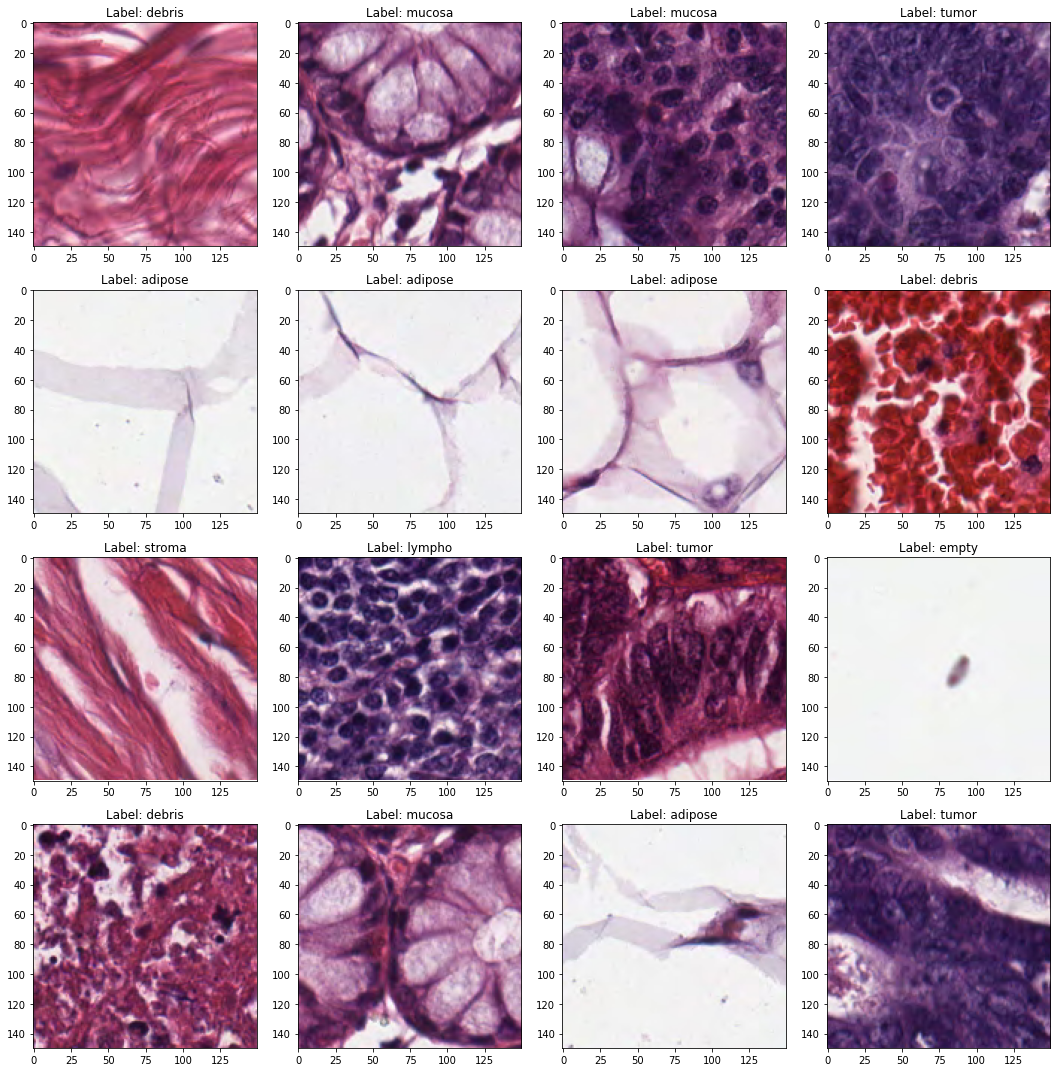

In [ ]:
view_dataset(training_set)

In [ ]:
(first_image, first_lable) = list(training_set.take(1))[0]
print("Label:", first_lable.numpy(), "\n")
print("Image shape:", first_image.shape, "\n")
print(first_image.numpy())

Label: 4 

Image shape: (150, 150, 3) 

[[[173  82 113]
  [186  95 126]
  [213  98 139]
  ...
  [213 106 148]
  [214 100 143]
  [221 107 150]]

 [[153  63  96]
  [170  80 113]
  [196  90 128]
  ...
  [215 109 147]
  [224 114 151]
  [225 115 152]]

 [[134  46  78]
  [153  65  97]
  [175  81 115]
  ...
  [204 100 133]
  [209 106 135]
  [200  97 126]]

 ...

 [[189  93 141]
  [203 107 155]
  [192 100 149]
  ...
  [195 100 138]
  [197  97 135]
  [198  98 136]]

 [[181  89 136]
  [184  92 139]
  [184  98 145]
  ...
  [188  98 134]
  [184  92 131]
  [186  94 133]]

 [[184  94 140]
  [178  88 134]
  [169  85 134]
  ...
  [183  91 128]
  [179  87 124]
  [179  87 124]]]


#IMAGE PRE-PROCESSING

In [ ]:
#karena Saya mengunakan pre-trained model, Saya akan mengubah input image nya menjadi (128 x 128 x 3)
IMG_SIZE = (128,128) 
 
def format_example(image, label):
    # Ubah ke float dan scala(0, 1) 
    image = tf.cast(image, tf.float32)
    image = image / 255.
 
    # atur ukuran
    image = tf.image.resize(image, IMG_SIZE)
    return image, label

In [ ]:
dataset_train = training_set.map(format_example)
dataset_val = validation_set.map(format_example)

In [ ]:
print(dataset_train)
print(dataset_val)

<MapDataset shapes: ((128, 128, 3), ()), types: (tf.float32, tf.int64)>
<MapDataset shapes: ((128, 128, 3), ()), types: (tf.float32, tf.int64)>


In [ ]:
(first_image, first_lable) = list(dataset_train.take(1))[0]
print("Label:", first_lable.numpy(), "\n")
print("Image shape:", first_image.shape, "\n")
print(first_image.numpy())

Label: 4 

Image shape: (128, 128, 3) 

[[[0.6761882  0.31966242 0.44190505]
  [0.75123054 0.37113518 0.50305367]
  [0.8267741  0.3788268  0.5386001 ]
  ...
  [0.84602576 0.42675495 0.5901128 ]
  [0.8408797  0.40198544 0.56775355]
  [0.8658294  0.42011863 0.58672404]]

 [[0.5866934  0.23577425 0.364175  ]
  [0.6747233  0.31023428 0.4429082 ]
  [0.75206923 0.3485153  0.49349082]
  ...
  [0.8235907  0.40992647 0.55389094]
  [0.8552093  0.4336548  0.5724576 ]
  [0.8576091  0.43331373 0.5703235 ]]

 [[0.52047986 0.19054721 0.31435236]
  [0.59522927 0.2570583  0.38288552]
  [0.66630405 0.3044168  0.43606508]
  ...
  [0.76366615 0.3659333  0.4987152 ]
  [0.7720974  0.3735232  0.500916  ]
  [0.75109196 0.35222554 0.47774637]]

 ...

 [[0.7620737  0.37886292 0.5654132 ]
  [0.8075736  0.42840695 0.6159682 ]
  [0.7457139  0.37818938 0.5686612 ]
  ...
  [0.78371537 0.40274107 0.5483906 ]
  [0.7944994  0.39396998 0.54087013]
  [0.7952484  0.38792607 0.5352606 ]]

 [[0.71985894 0.3550305  0.5403552

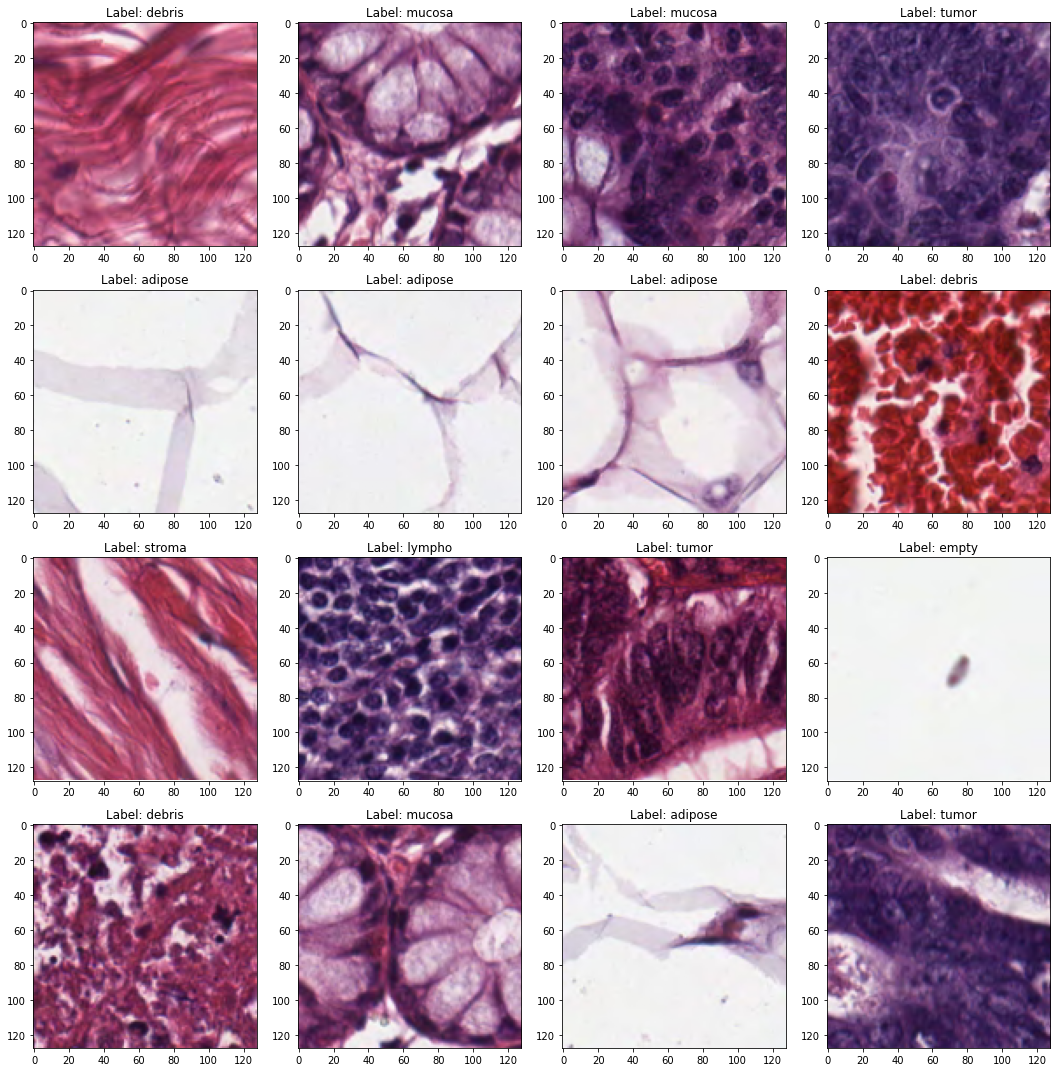

In [ ]:
view_dataset(dataset_train)

#IMAGE AUGMENTATION

Untuk mengurangi overfitting saya akan melakukan augmentation mengunakan cara ini [lebih lengkap](https://www.wouterbulten.nl/blog/tech/data-augmentation-using-tensorflow-data-dataset/).

In [ ]:
def augment_flip(image: tf.Tensor) -> tf.Tensor:
    image = tf.image.random_flip_left_right(image)
    image = tf.image.random_flip_up_down(image)
    return image

In [ ]:
def augment_rotation(image: tf.Tensor) -> tf.Tensor:
    # Rotate 0, 90, 180, 270 degrees
    return tf.image.rot90(
        image,
        tf.random.uniform(shape=[], minval=0, maxval=4, dtype=tf.int32)
    )

In [ ]:
def augment_zoom(image: tf.Tensor, min_zoom=0.8, max_zoom=1.0) -> tf.Tensor:
    image_width, image_height, image_colors = image.shape
    crop_size = (image_width, image_height)
 
    # Generate crop settings, ranging from a 1% to 20% crop.
    scales = list(np.arange(min_zoom, max_zoom, 0.01))
    boxes = np.zeros((len(scales), 4))
 
    for i, scale in enumerate(scales):
        x1 = y1 = 0.5 - (0.5 * scale)
        x2 = y2 = 0.5 + (0.5 * scale)
        boxes[i] = [x1, y1, x2, y2]
 
    def random_crop(img):
        # Create different crops for an image
        crops = tf.image.crop_and_resize(
            [img],
            boxes=boxes,
            box_indices=np.zeros(len(scales)),
            crop_size=crop_size
        )
        # Return a random crop
        return crops[tf.random.uniform(shape=[], minval=0, maxval=len(scales), dtype=tf.int32)]
 
    choice = tf.random.uniform(shape=[], minval=0., maxval=1., dtype=tf.float32)
 
    # Only apply cropping 50% of the time
    return tf.cond(choice < 0.5, lambda: image, lambda: random_crop(image))

In [ ]:
def augment_data(image, label):
    image = augment_flip(image)
    image = augment_rotation(image)
    image = augment_zoom(image) 
    return image, label

In [ ]:
dataset_train_augmented = dataset_train.map(augment_data)

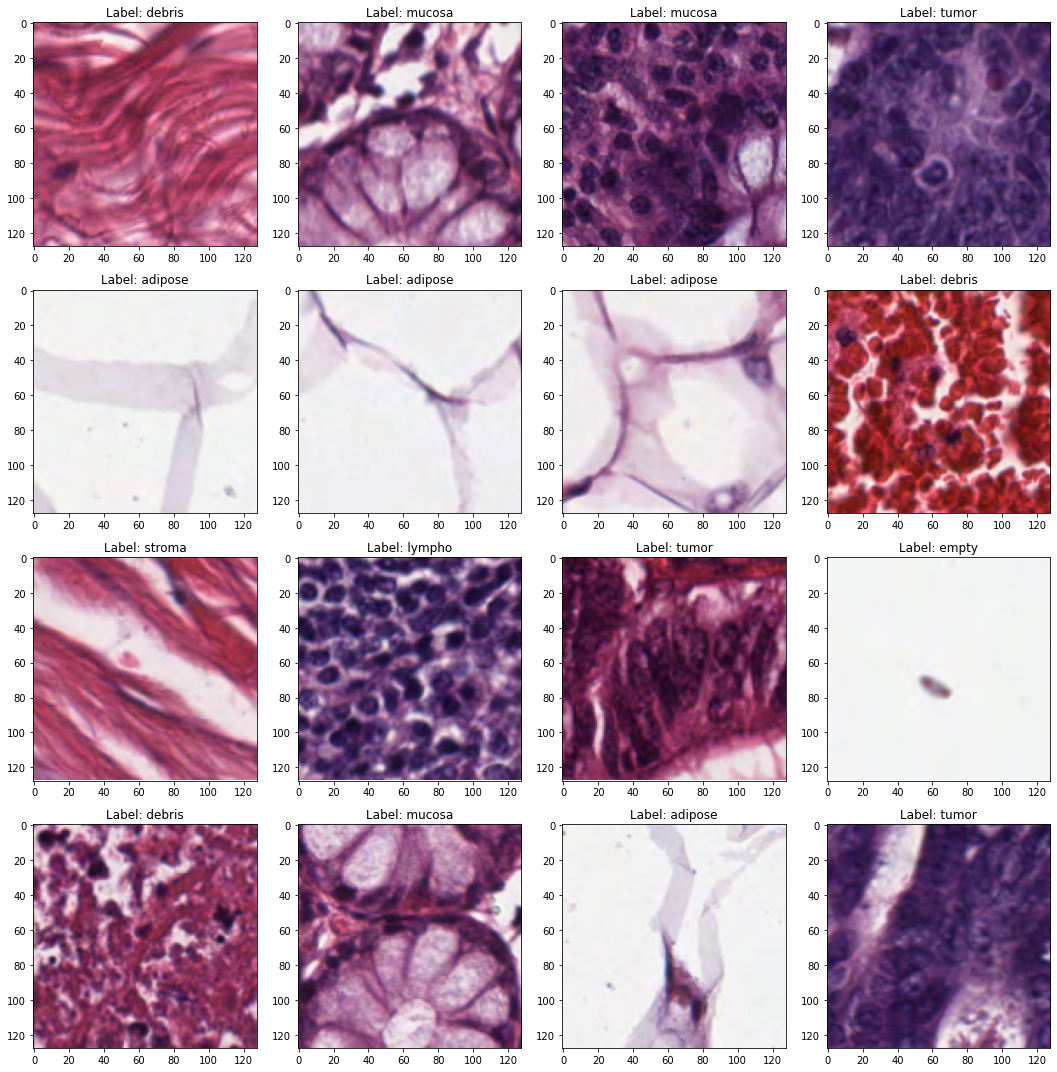

In [ ]:
view_dataset(dataset_train_augmented)

#SHUFFLE DAN BATCH

In [ ]:
AUTOTUNE = tf.data.AUTOTUNE
bc = 64
dataset_train_augmented_shuffled = dataset_train_augmented.cache().shuffle(1000).batch(batch_size=bc).prefetch(buffer_size=AUTOTUNE)
dataset_val_shuffled  = dataset_val.cache().batch(batch_size=bc).prefetch(buffer_size=AUTOTUNE)

In [ ]:
print(dataset_train_augmented_shuffled)
print(dataset_val_shuffled)

<PrefetchDataset shapes: ((None, 128, 128, 3), (None,)), types: (tf.float32, tf.int64)>
<PrefetchDataset shapes: ((None, 128, 128, 3), (None,)), types: (tf.float32, tf.int64)>


In [ ]:
#periksa
(first_image, first_lable) = list(dataset_train_augmented_shuffled.take(1))[0]
print("Label:", first_lable.numpy(), "\n")
print("Image shape:", first_image.shape, "\n")
print(first_image.numpy())

Label: [0 4 4 6 6 4 4 6 4 0 5 4 2 4 0 4 2 5 5 7 1 4 3 5 4 1 5 4 0 1 0 4 5 1 5 7 1
 4 4 0 5 4 5 0 1 7 5 7 2 7 3 2 1 6 4 3 5 7 2 7 5 4 6 6] 

Image shape: (64, 128, 128, 3) 

[[[[0.40682715 0.1844265  0.40618303]
   [0.29927167 0.11290046 0.25855187]
   [0.28080598 0.10523837 0.2272057 ]
   ...
   [0.91146225 0.8818859  0.8746743 ]
   [0.9115634  0.87361944 0.87565607]
   [0.9078639  0.86810535 0.8725799 ]]

  [[0.25886422 0.06704438 0.2913091 ]
   [0.18719746 0.04491805 0.18811658]
   [0.18133503 0.04790857 0.16586077]
   ...
   [0.9210304  0.8898698  0.8834201 ]
   [0.9252102  0.8859945  0.88991606]
   [0.9238329  0.88333046 0.8878954 ]]

  [[0.25149268 0.06306987 0.24137135]
   [0.19552404 0.04367109 0.18900564]
   [0.16113898 0.02464589 0.15318663]
   ...
   [0.9238646  0.88923186 0.8915187 ]
   [0.92487925 0.8889577  0.8930336 ]
   [0.9208758  0.8836674  0.8937912 ]]

  ...

  [[0.38250408 0.09683366 0.24590965]
   [0.36421654 0.09988064 0.2418537 ]
   [0.3733957  0.09982395 0.25157

#BUAT MODEL
Saya akan mengunakan pre-trained model VGG16

In [ ]:
base_model = tf.keras.applications.VGG16(
  input_shape=(128,128,3),
  include_top=False,
  weights="imagenet")

58892288/58889256 [==============================] - 0s 0us/step


In [ ]:
# Freezing Model
base_model.trainable = False

In [ ]:
for i in base_model.layers: 
    print(i)

In [ ]:
for i in base_model.layers[:15]:
    print(i)

In [ ]:
 
#TUNING PRE-TRAINED MODEL
for layer in base_model.layers[:15]:
    layer.trainable = True
for layer in base_model.layers[15:]:
    layer.trainable = False

In [ ]:
base_model.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 128, 128, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 128, 128, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 128, 128, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 64, 64, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 64, 64, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 64, 64, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 32, 32, 128)       0     

#TAMBAHKAN Fully Connected layers
 
Saya akan menambahkan Regularization untuk mengurangi overfitting

In [ ]:
class_ = dataset_info.features['label'].num_classes
class_

8

In [ ]:
models = Sequential()
 
models.add(Conv2D(filter=))
models.add(Flatten())
models.add(BatchNormalization())
 
#models.add(Dense(0,activation="relu")) 
#models.add(BatchNormalization())
#models.add(Dropout(0.5))
 
#models.add(Dense(0,activation="relu"))
#models.add(BatchNormalization())
#models.add(Dropout(0.5))
 
models.add(Dense(64, activation="relu")) 
models.add(BatchNormalization()) 
models.add(Dropout(0.5))
 
models.add(Dense(units=class_,activation="softmax"))

In [ ]:
models.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Functional)           (None, 4, 4, 512)         14714688  
_________________________________________________________________
flatten (Flatten)            (None, 8192)              0         
_________________________________________________________________
batch_normalization (BatchNo (None, 8192)              32768     
_________________________________________________________________
dense (Dense)                (None, 64)                524352    
_________________________________________________________________
batch_normalization_1 (Batch (None, 64)                256       
_________________________________________________________________
dropout (Dropout)            (None, 64)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 8)                 5

In [ ]:
RMS = tf.keras.optimizers.RMSprop(learning_rate=0.001)
ADAM = tf.keras.optimizers.Adam(learning_rate = 0.0001)
SGD = tf.keras.optimizers.SGD(learning_rate = 0.01,momentum=0.9)
 
models.compile(optimizer=ADAM,
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

In [ ]:
steps_per_epoch = train_example // bc
validation_steps = val_example // bc
epoch = 50
 
print("steps_per_epoch:", steps_per_epoch)
print("validation_steps:", validation_steps)

steps_per_epoch: 62
validation_steps: 15


In [ ]:
#callback untuk mencegah overfit
early_stopping_callback = tf.keras.callbacks.EarlyStopping(patience=10,
                                                           monitor="val_loss", 
                                                           mode="min")
 
#callback untuk kurangi kecepatan pembelajaran saat metrik berhenti meningkat
reduceLROnPlat = ReduceLROnPlateau(monitor="loss", 
                                   factor=0.8,
                                   patience=10, 
                                   verbose=1,
                                   mode="auto", 
                                   min_delta=0.0001,
                                   cooldown=10,
                                   min_lr=0.0001)

In [ ]:
training_history = models.fit(
    x=dataset_train_augmented_shuffled.repeat(), 
    validation_data=dataset_val_shuffled.repeat(), 
    epochs=epoch,
    steps_per_epoch=steps_per_epoch,
    validation_steps=validation_steps,
    callbacks=[early_stopping_callback,reduceLROnPlat],
    verbose=1
)

Epoch 1/50
62/62 [==============================] - 64s 394ms/step - loss: 1.6167 - accuracy: 0.4745 - val_loss: 1.1011 - val_accuracy: 0.6708
Epoch 2/50
62/62 [==============================] - 24s 335ms/step - loss: 0.7626 - accuracy: 0.7276 - val_loss: 0.7308 - val_accuracy: 0.7479
Epoch 3/50
62/62 [==============================] - 21s 336ms/step - loss: 0.5049 - accuracy: 0.8270 - val_loss: 0.6266 - val_accuracy: 0.8146
Epoch 4/50
62/62 [==============================] - 21s 338ms/step - loss: 0.4328 - accuracy: 0.8498 - val_loss: 0.3431 - val_accuracy: 0.8781
Epoch 5/50
62/62 [==============================] - 21s 339ms/step - loss: 0.3589 - accuracy: 0.8788 - val_loss: 0.4623 - val_accuracy: 0.8365
Epoch 6/50
62/62 [==============================] - 21s 341ms/step - loss: 0.3299 - accuracy: 0.8925 - val_loss: 0.5553 - val_accuracy: 0.7937
Epoch 7/50
62/62 [==============================] - 21s 343ms/step - loss: 0.3142 - accuracy: 0.8984 - val_loss: 0.2968 - val_accuracy: 0.8958

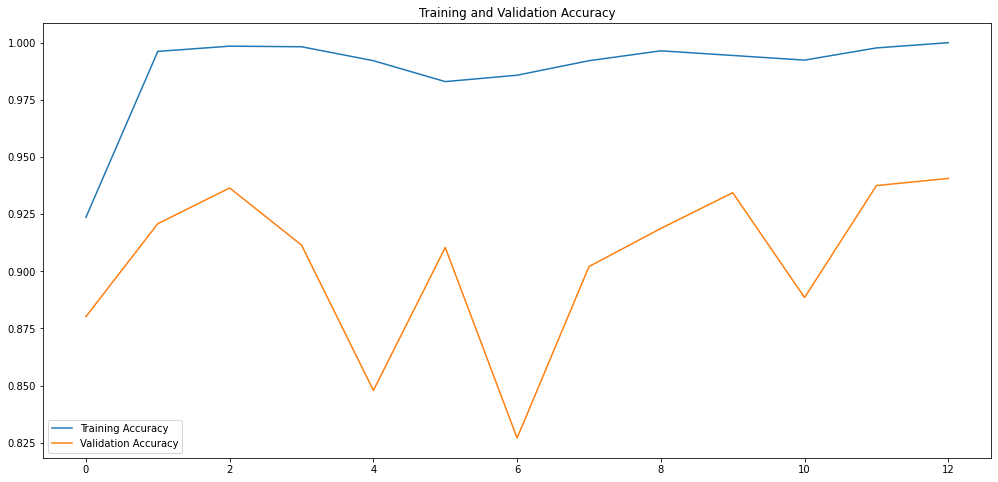

In [ ]:
#accuracy plot
epochs_range = range(13) 
acc = training_history.history["accuracy"]
val_acc = training_history.history["val_accuracy"]
 
plt.figure(figsize = (17,8))
plt.plot(epochs_range, acc, label="Training Accuracy")
plt.plot(epochs_range, val_acc, label="Validation Accuracy")
plt.legend() 
plt.title("Training and Validation Accuracy") 
plt.show()

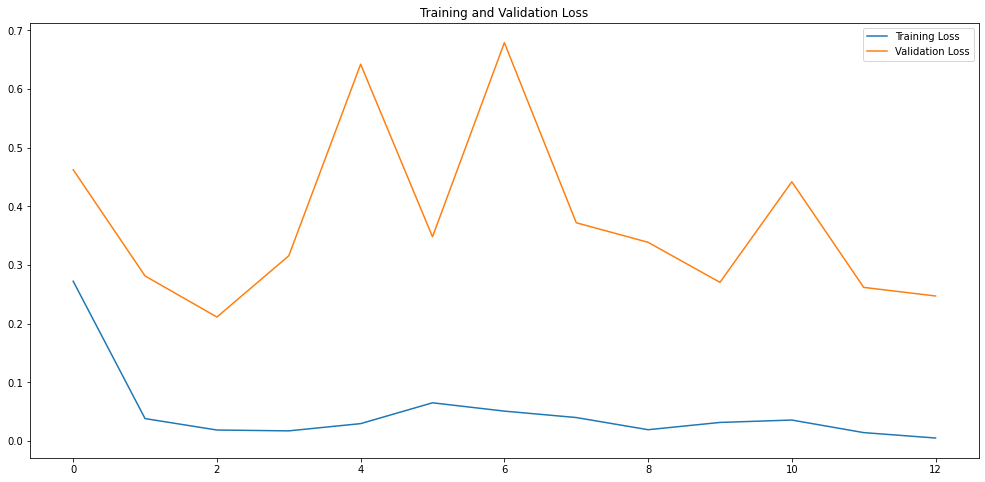

In [ ]:
#loss plot
epochs_range = range(13) 
loss = training_history.history["loss"]
val_loss = training_history.history["val_loss"]
 
plt.figure(figsize = (17,8))
plt.plot(epochs_range, loss, label="Training Loss")
plt.plot(epochs_range, val_loss, label="Validation Loss")
plt.legend() 
plt.title("Training and Validation Loss")
plt.show()

#TF-LITE

In [ ]:
converter = tf.lite.TFLiteConverter.from_keras_model(models)
tflite_model = converter.convert()
 
with tf.io.gfile.GFile("model.tflite", "wb") as f:
  f.write(tflite_model)

INFO:tensorflow:Assets written to: /tmp/tmpi1trzwfr/assets


INFO:tensorflow:Assets written to: /tmp/tmpi1trzwfr/assets


In [ ]:
 ls -la | grep "model"

-rw-r--r-- 1 root root 61003616 Jul 18 12:52 model.tflite


#KESIMPULAN
 
-data berisi 5000 contoh di setiap kelasnya
 
-data mempunyai 8 kelas
 
-saya mengunakan pre-trained model VGG16 dgn accuracy train/val (98/89),
Dan saya mentuning Layers VGG mendapatkan accuracy yang memuaskan yaitu train/Val (100,94) dan itu bagus
 
 
 
 
TERIMA KASIH UNTUK,
 
DiCODING & LINTARSERTA